## How to deal with Outliers

In [97]:
import pandas as pd
df = pd.read_csv("train.csv")


In [98]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000,NaN,360.000,1.000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000,128.000,360.000,1.000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000,66.000,360.000,1.000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000,120.000,360.000,1.000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000,141.000,360.000,1.000,Urban,Y


## Impact of Outliers

In [99]:
df.ApplicantIncome.describe()

count     619.000
mean     5403.826
std      6087.003
min       150.000
25%      2885.500
50%      3814.000
75%      5807.500
max     81000.000
Name: ApplicantIncome, dtype: float64

### Boxplot and Stripplot

/Users/e106922/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

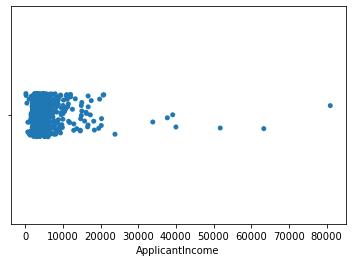

In [100]:
import seaborn as sns
sns.stripplot(df["ApplicantIncome"])

In [101]:
df.ApplicantIncome.append(pd.Series(1000000)).describe()

count       620.000
mean       7008.013
std       40404.336
min         150.000
25%        2887.250
50%        3815.000
75%        5815.750
max     1000000.000
dtype: float64

/Users/e106922/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

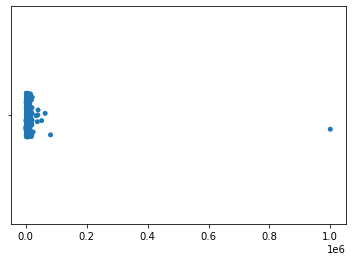

In [102]:
sns.stripplot(df["ApplicantIncome"].append(pd.Series(1000000)))

## Detect Outliers

### Boxplot

<AxesSubplot:xlabel='ApplicantIncome'>

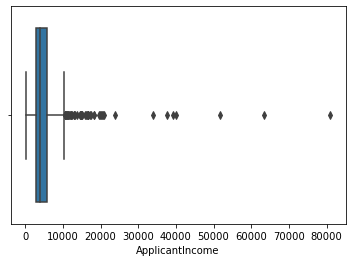

In [103]:
import seaborn as sns
sns.boxplot(data=df,x=df["ApplicantIncome"])

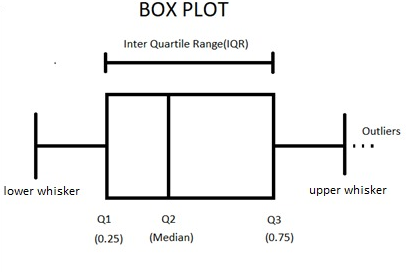

In [104]:
from IPython.display import Image 
Image("boxplot.png")

In [105]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q2 = df['ApplicantIncome'].quantile(0.5)
Q3 = df['ApplicantIncome'].quantile(0.75)


IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)

Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

2885.5
5807.5
2922.0
-1497.5 10190.5


In [109]:
df[df['ApplicantIncome'] > Upper_Whisker]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000,349.000,360.000,1.000,Semiurban,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.000,320.000,360.000,1.000,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.000,286.000,360.000,0.000,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.000,312.000,360.000,1.000,Urban,Y
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.000,NaN,360.000,1.000,Urban,Y
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.000,225.000,360.000,1.000,Urban,Y
115,LP001401,Male,Yes,1,Graduate,No,14583,0.000,185.000,180.000,1.000,Rural,Y
119,LP001422,Female,No,0,Graduate,No,10408,0.000,259.000,360.000,1.000,Urban,Y
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.000,370.000,360.000,1.000,Rural,Y
128,LP001451,Male,Yes,1,Graduate,Yes,10513,3850.000,160.000,180.000,0.000,Urban,N


### Z Score Method

In [110]:
### If Data point that falls outside of +-3 standard deviations --> it can be considered as potential outlier

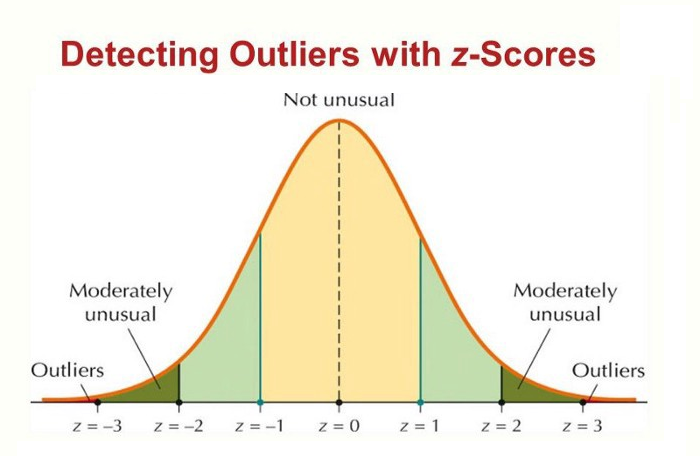

In [111]:
Image("zscore.png")

In [125]:
from scipy import stats
import numpy as np
df["ApplicantIncome_zscore"] = stats.zscore(df["ApplicantIncome"]).astype('int')
print(z)

[ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
  0  0  0  0  0  0  3  0  0  0  2  0  0  0  0  0  0  0  1  0  0  0  0  0
  1  0  1  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  4  0  5  0  0  0  0  0  1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  2  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0

In [113]:
threshold = 3
df[df["ApplicantIncome_zscore"]>threshold]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_zscore
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.000,600.000,180.000,0.000,Semiurban,Y,5
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.000,700.000,300.000,1.000,Urban,Y,7
183,LP001637,Male,Yes,1,Graduate,No,33846,0.000,260.000,360.000,1.000,Semiurban,N,4
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.000,120.000,360.000,1.000,Semiurban,Y,5
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.000,490.000,180.000,1.000,Urban,Y,9
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.000,360.000,360.000,0.000,Rural,N,12
443,LP002422,Male,No,1,Graduate,No,37719,0.000,152.000,360.000,1.000,Semiurban,Y,5


### Handling Outliers

#### Trimming/Remove the outliers

In [121]:
df.shape

(619, 14)

In [120]:
df[df["ApplicantIncome_zscore"] > threshold].shape

(7, 14)

In [123]:
df[~(df["ApplicantIncome_zscore"] > threshold)].shape

(612, 14)

#### Quantile based flooring and capping

In [ ]:
np.where(df["ApplicantIncome_zscore"]  > threshold , df['ApplicantIncome'].quantile(0.99),df['ApplicantIncome'])

#### Mean/Median imputation

#### Data Transformation

Outlier Treatment

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

/Users/e106922/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

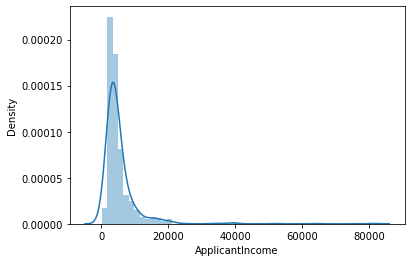

In [127]:
sns.distplot(df['ApplicantIncome'])

/Users/e106922/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


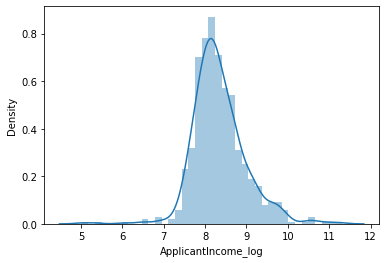

In [129]:
df['ApplicantIncome_log'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncome_log'])

## Pandas Regex Function

In [93]:
uber = pd.read_csv('uberdrive_1.csv')
uber = uber.dropna()

In [94]:
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.100,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.800,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.700,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.700,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.300,Meal/Entertain


#### Contains Function


In [95]:
uber[uber["START*"].str.contains('[~!@#$%^&*<>?]')]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
140,2/20/2016 14:50,2/20/2016 15:54,Business,R?walpindi,R?walpindi,23.100,Meeting
1119,12/27/2016 7:02,12/27/2016 7:14,Business,Kar?chi,Kar?chi,4.900,Temporary Site
1120,12/27/2016 8:37,12/27/2016 8:59,Business,Kar?chi,Kar?chi,5.000,Meal/Entertain
1121,12/27/2016 12:53,12/27/2016 12:57,Business,Kar?chi,Kar?chi,0.600,Meal/Entertain
1122,12/27/2016 14:49,12/27/2016 15:03,Business,Kar?chi,Unknown Location,3.100,Customer Visit
1124,12/27/2016 19:19,12/27/2016 19:50,Business,Kar?chi,Kar?chi,5.500,Customer Visit
1125,12/28/2016 8:34,12/28/2016 9:06,Business,Kar?chi,Unknown Location,10.300,Meal/Entertain
1127,12/28/2016 13:53,12/28/2016 14:01,Business,Kar?chi,Kar?chi,2.000,Errand/Supplies
1128,12/28/2016 15:04,12/28/2016 15:39,Business,Kar?chi,Unknown Location,8.500,Meal/Entertain
1130,12/28/2016 18:33,12/28/2016 18:56,Business,Kar?chi,Kar?chi,3.800,Errand/Supplies


####  Replace Function

Replaces all the occurence of matched pattern in the string

In [96]:
uber["START*"].str.replace("?","a")

<ipython-input-96-43f7d9258b62>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  uber["START*"].str.replace("?","a")


0            Fort Pierce
2            Fort Pierce
3            Fort Pierce
4            Fort Pierce
5        West Palm Beach
              ...       
1150             Karachi
1151             Karachi
1152    Unknown Location
1153          Katunayake
1154             Gampaha
Name: START*, Length: 653, dtype: object

#### Count Function

First we are counting the countries starting with character ‘F’. 

In [68]:
uber["START*"].str.count('^F').sum()

15.0

In [84]:
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.100,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.000,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.800,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.700,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.700,Customer Visit


In [ ]:
#### Split Function

In [85]:
s = pd.Series(["Mumbai Delhi 76 Office_trip"])
s.str.split(expand=True)

,0,1,2,3
0,Mumbai,Delhi,76,Office_trip
